In [1]:
from sklearn.ensemble import  RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split, KFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import japanize_matplotlib

Best Hyperparameters: {'classifier__max_depth': 5, 'classifier__min_samples_leaf': 2, 'classifier__min_samples_split': 10, 'classifier__n_estimators': 50}
Cross-validation score: 0.11
Mean Absolute Error: 0.11
Mean Squared Error: 0.11
Root Mean Squared Error: 0.32
Accuracy:0.89%
Confusion Matrix:
[[ 0  2]
 [ 0 17]]

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.89      1.00      0.94        17

    accuracy                           0.89        19
   macro avg       0.45      0.50      0.47        19
weighted avg       0.80      0.89      0.85        19



C:\Users\00220401626\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\00220401626\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\00220401626\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _wa

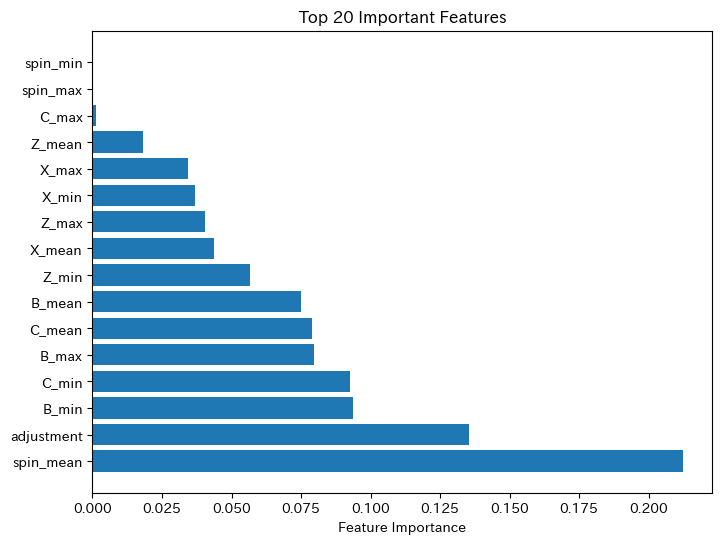

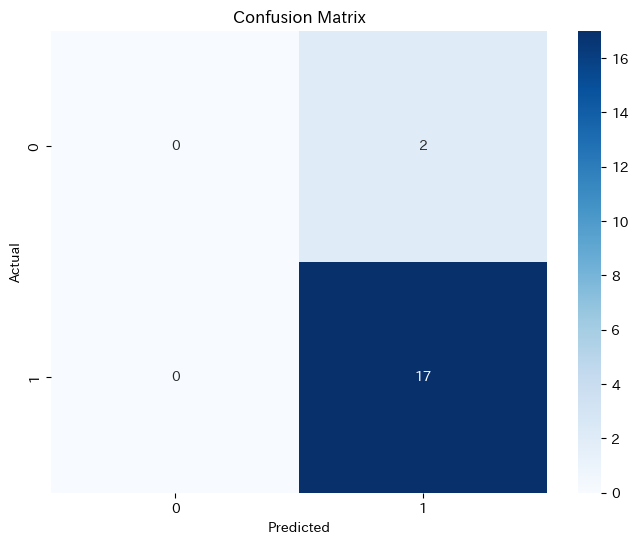

In [2]:
# データセットの読み込み
d = pd.read_csv(r"C:\Users\00220401626\Desktop\必要なファイル\Classification.csv", encoding='cp932')
d.drop(columns=['Angl_gosa','diam_gosa'],inplace=True)
# ラベルエンコーディング
le = LabelEncoder()
d['judge'] = le.fit_transform(d['judge'])

# 説明変数と目的変数の設定
X = d.drop('judge', axis=1)
y = d['judge']

# 訓練用データとテスト用データに分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Pipelineによるモデルの構築
pipeline = Pipeline([
    ('scaler', MinMaxScaler()),
    ('classifier', RandomForestClassifier(random_state=0))
])

# ハイパーパラメーターチューニングのためのグリッドサーチ
params = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__max_depth': [5, 10, 20],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4]
}
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
grid_search = GridSearchCV(pipeline, param_grid=params, cv=kfold, scoring='neg_mean_squared_error', n_jobs=-1)

# モデルの学習
grid_search.fit(X_train, y_train)

# 最適なハイパーパラメーターの表示
print(f"Best Hyperparameters: {grid_search.best_params_}")

# 交差検証スコアの表示
print(f"Cross-validation score: {-grid_search.best_score_:.2f}")

# テストデータに対する予測
y_pred = grid_search.best_estimator_.predict(X_test)

# 評価指標の算出
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

# 評価指標の表示
print(f"Mean Absolute Error: {mae:.2f}")
print(f"Mean Squared Error: {mse:.2}")
print(f"Root Mean Squared Error: {rmse:.2f}")
# print(f"R-squared: {r2:.2f}")
print(f"Accuracy:{accuracy:.2f}%")
      
# 混同行列と分類レポートを出力する
cm = confusion_matrix(y_test, y_pred)
cr = classification_report(y_test, y_pred)
print("Confusion Matrix:")
print(cm)
print("\nClassification Report:")
print(cr)


# 特徴量の重要度をプロットする
feature_importance = grid_search.best_estimator_.named_steps['classifier'].feature_importances_
feature_names = X_train.columns.values
sorted_idx = feature_importance.argsort()[::-1][:20]
pos = np.arange(sorted_idx.shape[0]) + 0.5
plt.figure(figsize=(8, 6))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, feature_names[sorted_idx])
plt.xlabel('Feature Importance')
plt.title('Top 20 Important Features')
plt.show()

# 混同行列のヒートマップを作成する
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [3]:
q=pd.DataFrame()

In [4]:
q['y_test']=y_test
q['y_pred']=y_pred
q

,y_test,y_pred
2,1,1
30,1,1
56,1,1
16,1,1
13,1,1
61,1,1
62,1,1
80,1,1
33,1,1
79,1,1


In [5]:
d

,X_min,X_max,X_mean,Z_min,Z_max,Z_mean,B_min,B_max,B_mean,C_min,C_max,C_mean,spin_min,spin_max,spin_mean,adjustment,judge
0,-3.680308,2.993683,-0.542178,-27.327657,29.305136,-1.830843,1.057402,2.567976,1.329227,-14.281791,-0.975007,-8.057247,-75.000000,100.0,5.688643,0.190,1
1,-2.842626,2.938753,-0.591089,-27.396320,28.989289,-1.893224,1.098599,2.732766,1.554262,-12.743752,0.041197,-7.818753,2.939453,100.0,5.686050,0.190,1
2,-3.021148,2.691568,-0.605775,-27.629772,29.167811,-1.929010,1.084867,2.691568,1.584439,-12.015930,-0.480637,-7.933571,-75.000000,100.0,5.749148,0.195,1
3,-3.021148,2.279594,-0.710832,-28.028014,29.126614,-1.933528,1.029937,2.691568,1.559004,-12.304312,-0.357045,-7.878372,-75.000000,100.0,5.733713,0.195,1
4,-3.117275,2.966218,-0.898901,-27.822027,29.167811,-1.917206,1.002472,2.513046,1.664894,-11.892337,-0.357045,-7.903131,-75.000000,100.0,5.713317,0.200,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90,-3.556715,2.622906,-1.166369,-27.918154,29.181544,-1.912015,0.837682,3.007416,1.792151,-11.741280,0.096127,-7.745512,-75.000000,100.0,5.595768,0.237,0
91,-3.131008,2.732766,-1.040649,-27.698434,29.387531,-1.782361,0.878879,2.993683,1.777125,-12.565229,-0.041197,-8.103062,-75.000000,100.0,5.339179,0.225,0
92,-3.199670,2.938753,-0.479264,-27.451250,29.222741,-1.821631,0.700357,2.128536,0.998041,-12.427904,-0.068662,-8.122134,-75.000000,100.0,5.451581,0.225,0
93,-3.309530,2.677836,-1.275646,-28.014282,29.195276,-1.862621,0.810217,3.158473,1.939816,-12.414172,0.000000,-8.059426,-75.000000,100.0,5.746767,0.225,0


In [6]:
# Split the data into training, validation, and test sets

# Set up the pipeline with a scaler and a regressor

# Set up K-fold cross-validation

# Visualize the actual vs predicted values

In [ ]:
# Split the data into training, validation, and test sets